1. Get Data 

In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("regression_data.xls")
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


2. EDA: Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.shape

(21597, 21)

In [5]:
#Check Descriptive Statistics

df.describe(include=[np.number])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
#Check for Nulls
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

3. Data Cleaning 

In [7]:
#Check for duplicates 
df.duplicated().sum()

0

Analyse categorical columns

In [8]:
#Check the types

df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
#Change select set to object type

df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']].astype(object)


In [10]:
#For each categorical column let's check the number of unique values (%)

categorical=[column for column in df.columns if (df[column].dtype==object)] 
for a in categorical:
    print ('Column Name: {}'.format(df[a].name)) 
    print('Unique Values: {}'.format(len(df[a].unique()))) 
    print(df[a].unique())
    print(df[a].value_counts())
    print(f"{round(df[a].value_counts()/sum(df[a].value_counts())*100,2)} %")
    print('\n') 


Column Name: bedrooms
Unique Values: 12
[3 2 4 5 1 6 7 8 9 11 10 33]
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
3     45.49
4     31.87
2     12.78
5      7.41
6      1.26
1      0.91
7      0.18
8      0.06
9      0.03
10     0.01
11     0.00
33     0.00
Name: bedrooms, dtype: float64 %


Column Name: bathrooms
Unique Values: 29
[1.0 2.25 3.0 2.0 4.5 1.5 2.5 1.75 2.75 3.25 4.0 3.5 0.75 4.75 5.0 4.25
 3.75 1.25 5.25 6.0 0.5 5.5 6.75 5.75 8.0 7.5 7.75 6.25 6.5]
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
2.50    24

Analyse categorical columns

In [11]:
#Put all numerical columns in a new dataframe
numerical = df._get_numeric_data()
numerical

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,1180,5650,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,6414100192,2570,7242,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,5631500400,770,10000,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,2487200875,1960,5000,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,1954400510,1680,8080,1680,0,1987,0,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1530,1131,1530,0,2009,0,47.6993,-122.346,1530,1509,360000
21593,6600060120,2310,5813,2310,0,2014,0,47.5107,-122.362,1830,7200,400000
21594,1523300141,1020,1350,1020,0,2009,0,47.5944,-122.299,1020,2007,402101
21595,291310100,1600,2388,1600,0,2004,0,47.5345,-122.069,1410,1287,400000


In [12]:
numerical.describe()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,2080.321850,1.509941e+04,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,918.106125,4.141264e+04,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,1430.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,2550.000000,1.068500e+04,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [13]:
#Update date column to so we can run it within the numerical columns. * might not make sense to use this 

df['date']=df['date'].apply(lambda x: x.toordinal())
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,735519,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,735654,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,735576,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,735647,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [14]:
#Dropping irrelevant columns - The square footage of living and lot seem to be dupes of the columns sqft_living15and sqft_lot15 which have more recent data

df=df.drop(columns=['id', 'sqft_living', 'sqft_lot'], axis=1)


In [15]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,735519,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,735576,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,735654,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,735576,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,735647,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


5. EDA : Exploratory data analysis

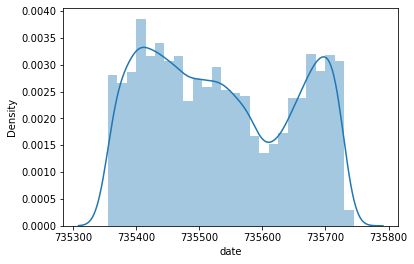

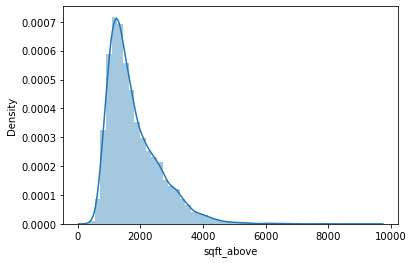

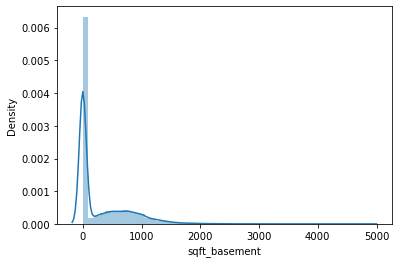

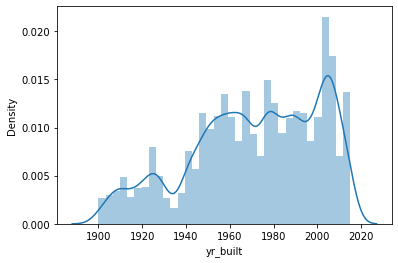

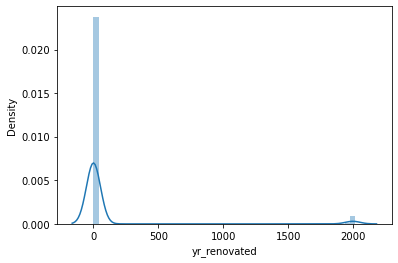

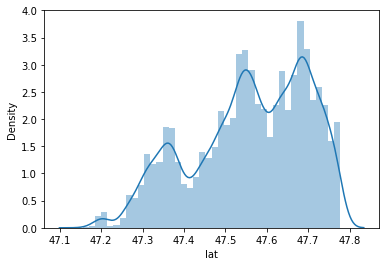

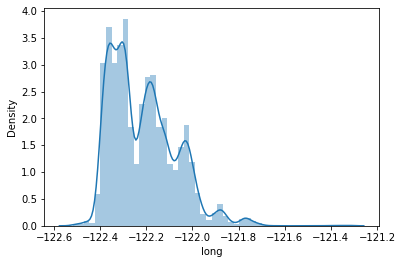

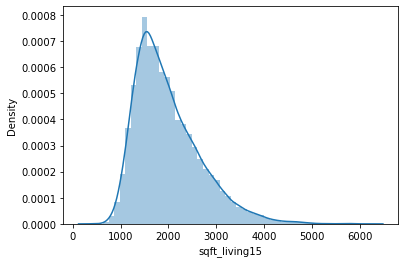

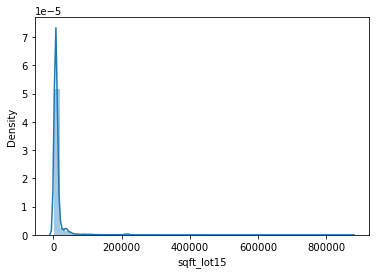

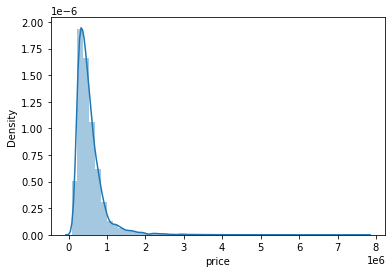

In [16]:
# Check Distributions

for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

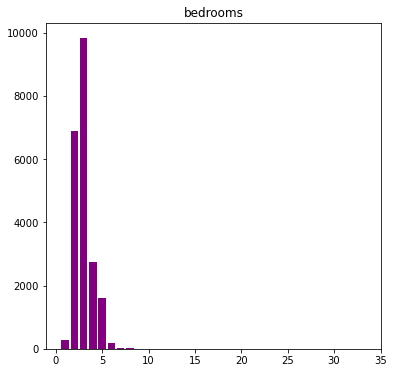

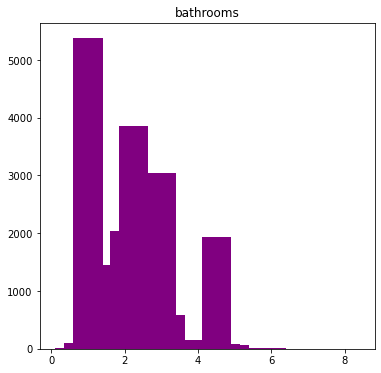

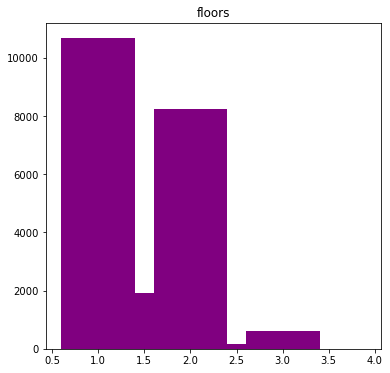

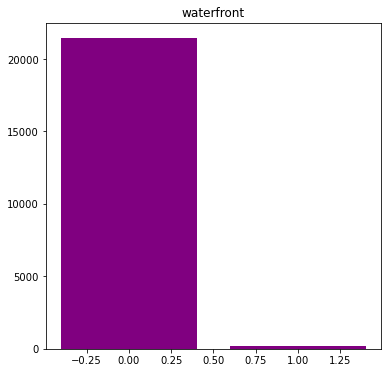

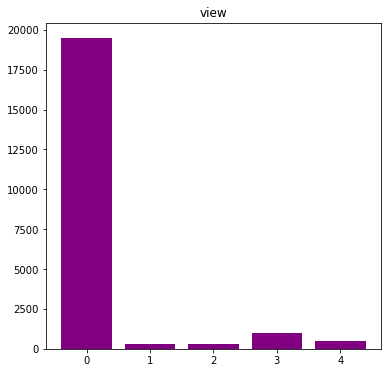

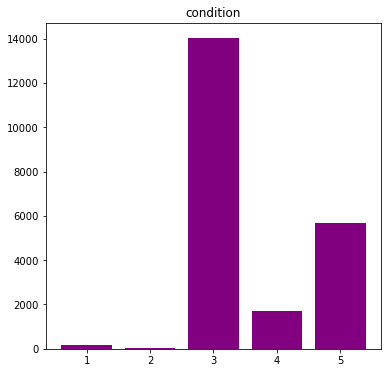

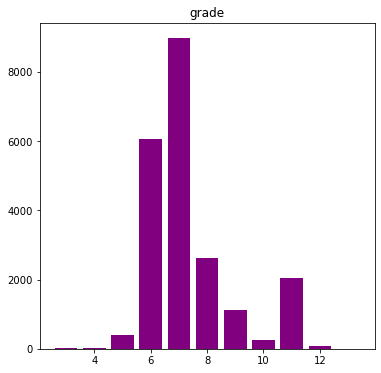

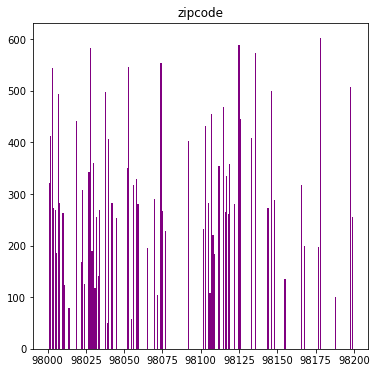

In [17]:
#Use Barplot to check categorical columns


for a in categorical:
    plt.figure(figsize=(6,6))
    plt.bar(df[a].unique(), df[a].value_counts(), color="purple")
    plt.title(a)
    plt.show();

(10.5, -0.5)

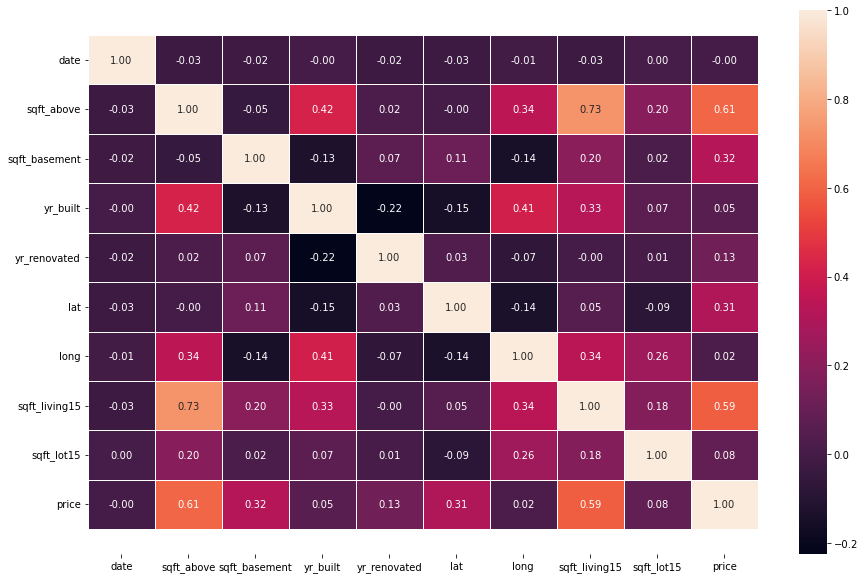

In [18]:
#Plot a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Linear Regression

In [19]:
#import linear-model from scikit-learn and evaluation metrics, and math library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [20]:
#create a Linear Regression object using the constructor:
lm = LinearRegression()

In this case we want to predict the prices of properties based on different features, our target variable is the price column.

In [21]:
#define the predictor and the target variable 
x = df.drop(columns=['price'])
y = df['price']
x

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,735519,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,735576,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,735654,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,735576,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,735647,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,735374,3,2.5,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,735652,4,2.5,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,735407,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,735614,3,2.5,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
#check the shape of both x, y (should have same number of rows)

print('X Shape:', x.shape)
print('Y Shape:', y.shape)

X Shape: (21597, 17)
Y Shape: (21597,)


In [23]:
#Split into train - test

from sklearn.model_selection import train_test_split


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=40)

In [25]:
# starting the model

model = LinearRegression()

# training the model
model = lm.fit(x_train,y_train)

In [26]:
#Fit over our train data and predict against X test features
y_pred = lm.predict(x_test)

In [27]:
# Check metrics for model accuracy 

print('R2: ', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mae(y_test, y_pred))

R2:  0.7039318450015852
MSE: 40386030205.38349
RMSE:  200962.75825481568
MAE:  124947.5348915068


R2

MSE: Mean Squared Error

RMSE : Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

MAE : Mean Absolute Error

# Improve the Model 

To improve our model and get more accurate results, we will apply some different pre-processing methods:

a - Standardization: values are centered around the mean with a unit standard deviation.

b - Normalization: values are rescaled so that they end up ranging between 0 and 1.

c - Dealing with outliers

In [28]:
# Going to drop lat and long, as the same information is presented in zipcode.

df = df.drop(['lat', 'long'], axis=1)

df.describe()


,date,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,735535.180997,1788.596842,291.725008,1970.999676,84.464787,1986.620318,12758.283512,5.402966e+05
std,113.059987,827.759761,442.667800,29.375234,401.821438,685.230472,27274.441950,3.673681e+05
min,735355.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,735436.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.220000e+05
50%,735522.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,735646.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,6.450000e+05
max,735745.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


# a - Standardization

We will standardise all the numeric features we need. 

In [29]:
num = df._get_numeric_data()
x_num = num.drop(columns=['price'])

In [30]:
# rescale using Standard Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_stan = transformer.transform(x_num)
print(x_stan.shape)

(21597, 7)


In [31]:
x_stan

array([[-0.143122  , -0.73525069, -0.65903091, ..., -0.21020965,
        -0.94367562, -0.26062671],
       [ 0.36104681,  0.46077619,  0.24460216, ...,  4.74484229,
        -0.43288674, -0.18769961],
       [ 1.05096203, -1.23057495, -0.65903091, ..., -0.21020965,
         1.07029196, -0.17219022],
       ...,
       [-1.1337695 , -0.92854796, -0.65903091, ..., -0.21020965,
        -1.41068259, -0.39419807],
       [ 0.69715935, -0.22784535, -0.65903091, ..., -0.21020965,
        -0.84151784, -0.42059702],
       [-0.12543187, -0.92854796, -0.65903091, ..., -0.21020965,
        -1.41068259, -0.41803046]])

# b - Normalization

We encode the categoricals using the OneHotEncoder method

In [32]:
#store categorical features in a new x_cat

x_cat = df.select_dtypes(include = np.object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
X_enc = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
X_enc = X_enc.transform(x_cat).toarray()
X_enc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
# We will now concatenate the standardized dataframe plus our newly encoded dataframe

X = np.concatenate((x_stan, X_enc), axis= 1)

In [52]:
# Split the data to train & test at random

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)


# Linear Regression Model

In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
y_pred  = lm.predict(x_test)

In [54]:
# check metrics again

print('R2: ', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mae(y_test, y_pred))

R2:  0.7081741959303873
MSE: 39174961026.23603
RMSE:  197926.65567385315
MAE:  125406.29280528083


#Results are slightly better than previously, see first results below

R2:  0.7039318450015852
MSE: 40386030205.38349
RMSE:  200962.75825481568
MAE:  124947.5348915068

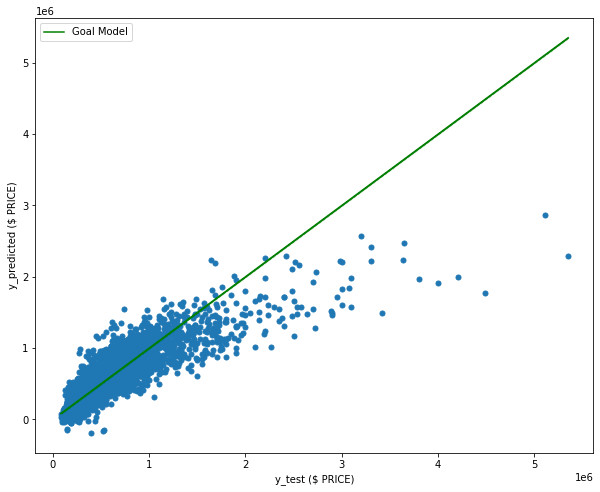

In [70]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=10, marker=".", ls='')

# Show the Ideal Model 
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='g', label='Goal Model')

# show legend
plt.legend();

plt.xlabel('y_test ($ PRICE)');
plt.ylabel('y_predicted ($ PRICE)');

<AxesSubplot:>

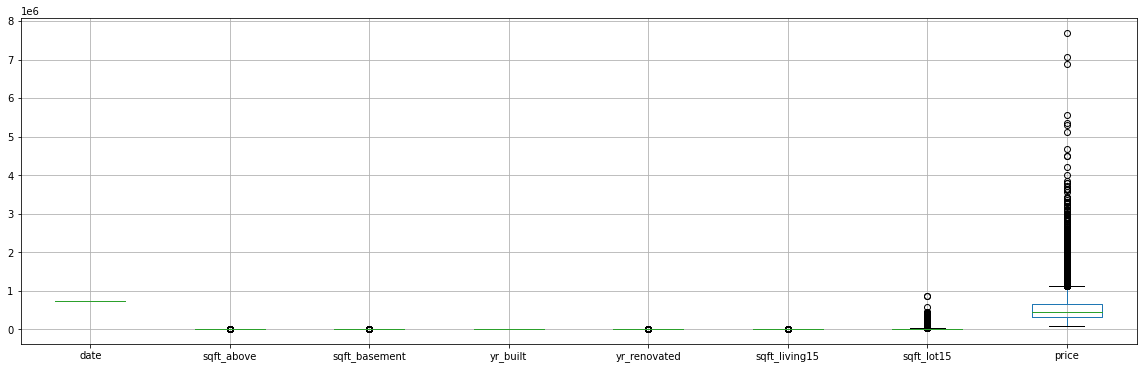

In [71]:
# From above we can see there are outliers - check with boxplot

plt.figure(figsize=(20, 6))
num.boxplot()

In [72]:
# Because sqft_living15 & sqft_above are closely correlated we will drop one

df = df.drop(['sqft_living15'], axis=1)


In [73]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_lot15,price
0,735519,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,5650,221900
1,735576,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,7639,538000
2,735654,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,8062,180000
3,735576,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,5000,604000
4,735647,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,7503,510000


 # Standardise again

In [74]:
x_num = df.select_dtypes(include = np.number)
x_cat = df.select_dtypes(include = np.object)

In [75]:
x_num = x_num.drop(['price'], axis=1)

In [78]:
# rescale with Standard Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_stan = transformer.transform(x_num)
x_stan.shape

(21597, 6)

In [79]:
x_enco=pd.get_dummies(x_cat, drop_first=True)
x_enco.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# concatenate

x = np.concatenate((x_stan, x_enco), axis= 1)
y = df['price']
y.shape

(21597,)

In [85]:
#split and train and test randomly, as a %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [86]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
y_pred  = lm.predict(x_test)

In [87]:
print('R2: ', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mae(y_test, y_pred))

R2:  0.8433220743798442
MSE: 21032587057.918213
RMSE:  145026.15990888752
MAE:  86562.76050607441


Results are better now than previously: 

R2:  0.7081741959303873
MSE: 39174961026.23603
RMSE:  197926.65567385315
MAE:  125406.29280528083

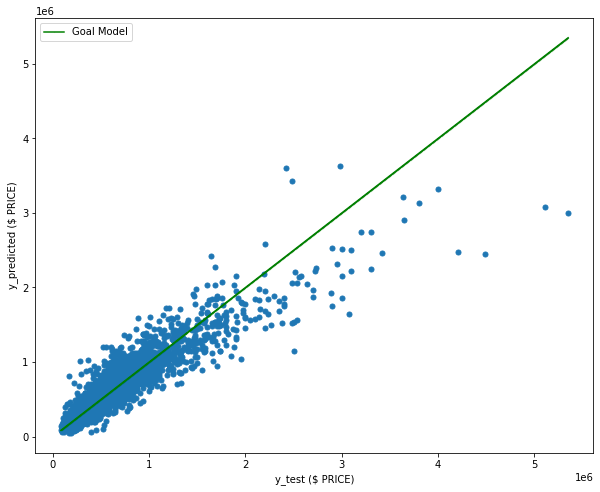

In [89]:
#Plot new model 

# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=10, marker=".", ls='')

# Show the Ideal Model 
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='g', label='Goal Model')

# show legend
plt.legend();

plt.ylabel('y_predicted ($ PRICE)');
plt.xlabel('y_test ($ PRICE)');

In [ ]:
# this one looks better than the previous 